In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('train_pre.csv')

In [5]:
df.head(1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,...,Dependents_1,Loan_Amount_Term_0,Loan_Amount_Term_1,Property_Area_0,Property_Area_1,Semiurban,Urban,1,2,3+
0,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,...,0.686111,0.302281,0.697719,0.341584,0.658416,0,1,0,0,0


In [6]:
X=df.copy()
y=df['Loan_Status']
X.drop(['Loan_Status'],axis=1,inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20,stratify=y_train,random_state=42)

In [26]:
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))
class_weights

/home/abhi/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1], y=572    1
531    1
41     1
543    1
213    1
      ..
512    1
10     1
501    1
18     0
180    0
Name: Loan_Status, Length: 392, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{0: 1.5934959349593496, 1: 0.7286245353159851}

In [18]:
from catboost import CatBoostClassifier

In [76]:
model = CatBoostClassifier(
    eval_metric='Accuracy',
    class_weights=class_weights
)


In [77]:
model.fit(
    X_train, y_train,
    use_best_model=True,
    eval_set=(X_cv, y_cv),
    verbose=50
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Learning rate set to 0.025145
0:	learn: 0.7391120	test: 0.7050230	best: 0.7050230 (0)	total: 1.42ms	remaining: 1.42s
50:	learn: 0.7984858	test: 0.7363348	best: 0.7450757 (41)	total: 63.4ms	remaining: 1.18s
100:	learn: 0.8620153	test: 0.7229839	best: 0.7524397 (57)	total: 119ms	remaining: 1.06s
150:	learn: 0.8945356	test: 0.7303478	best: 0.7524397 (57)	total: 169ms	remaining: 952ms
200:	learn: 0.9200895	test: 0.7229839	best: 0.7524397 (57)	total: 230ms	remaining: 915ms
250:	learn: 0.9422734	test: 0.7156199	best: 0.7524397 (57)	total: 283ms	remaining: 844ms
300:	learn: 0.9722399	test: 0.7156199	best: 0.7524397 (57)	total: 333ms	remaining: 773ms
350:	learn: 0.9803699	test: 0.7156199	best: 0.7524397 (57)	total: 383ms	remaining: 709ms
400:	learn: 0.9881524	test: 0.7229839	best: 0.7524397 (57)	total: 439ms	remaining: 656ms
450:	learn: 0.9962825	test: 0.7303478	best: 0.7524397 (57)	total: 497ms	remaining: 605ms
500:	learn: 0.9962825	test: 0.7464527	best: 0.7524397 (57)	total: 549ms	remaining:

In [82]:
accuracy_score(y_test,model.predict(X_test))

0.7804878048780488

In [89]:
from xgboost import XGBClassifier

In [87]:
xg = XGBClassifier()

In [88]:
xg.train(X_train,y_train,evals=(X_cv,y_cv))

KeyError: 0

In [57]:
test=pd.read_csv('test_pre.csv')
sample=pd.read_csv('sample.csv')

In [63]:
test.shape

(367, 20)

In [64]:
np.ones(3)

array([1., 1., 1.])

In [70]:
temp=pd.DataFrame()
temp['Loan_Status']=model.predict(test)
#temp['Loan_Status']=np.ones(367)

In [71]:
sample.drop(['Loan_Status'],axis=1,inplace=True)

In [72]:
sample=pd.concat([sample,temp],axis=1)

In [74]:
sample.replace({1:'Y',0:'N'},inplace=True)

In [75]:
sample.to_csv('subm1.csv',index=False)

/home/abhi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

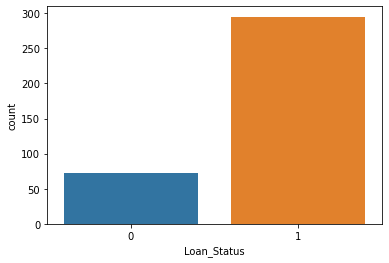

In [62]:
sns.countplot(sample['Loan_Status'])